In [1]:
import autograd.numpy as np
from autograd import grad, hessian
from scipy.spatial.distance import euclidean
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def F(x, a, b):
    return a*x + b

def G(x, a, b):
    return a/(1 + b*x)

In [3]:
def loss(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

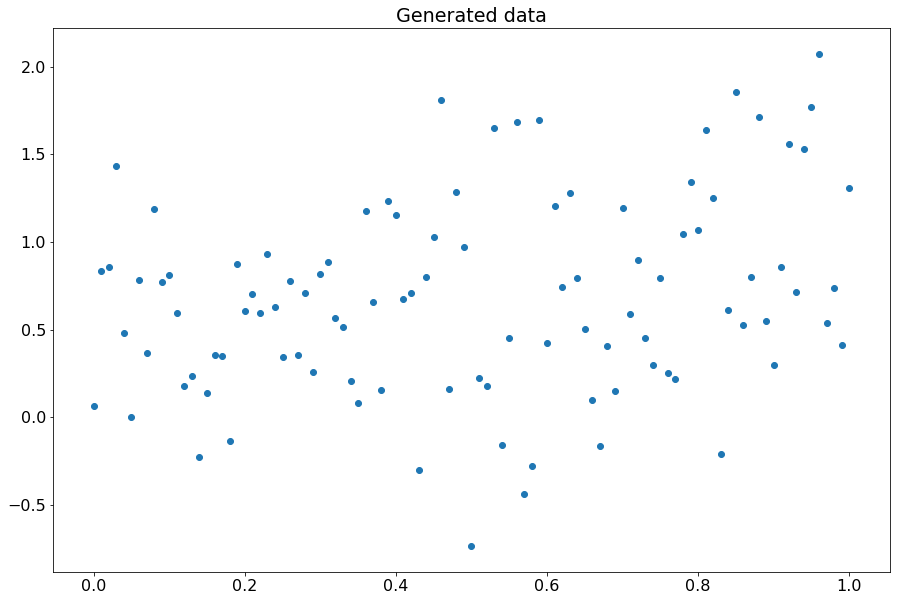

In [64]:
#alpha = np.random.rand()
#beta = np.random.rand()
    
#x = np.arange(0, 1.01, step=0.01)
#y = alpha*x + beta + np.random.normal(loc=0, scale=0.5, size=x.shape)

def linear_objective(p):
    return loss(F(x, p[0], p[1]), y)
    
def rational_objective(p):
    return loss(G(x, p[0], p[1]), y)

plt.figure(figsize=(15, 10))
plt.title('Generated data')
plt.scatter(x, y)
plt.savefig('data3.png')

In [58]:
def gradient_descent(f, x_0, eps, alpha):
    grad_f = grad(f)
    x_cur = x_0
    x_next = x_cur - alpha*grad_f(x_cur)
    i = 1
    while euclidean(x_cur, x_next) > eps:
        x_cur = x_next
        x_next = x_cur - alpha*grad_f(x_cur)
        i += 1
    return x_cur, i

In [59]:
def conjugate_gradients(f, x_0, eps):
    res = scipy.optimize.minimize(f, x_0, method='CG', tol=eps)
    return res.x, res.nit

In [60]:
def newtons_method(f, x_0, eps, alpha):
    grad_f = grad(f)
    hessian_f = hessian(f)
    x_cur = x_0
    x_next = x_cur - np.linalg.inv(hessian_f(x_cur)) @ grad_f(x_cur)
    i = 1
    while euclidean(x_cur, x_next) > eps:
        x_cur = x_next
        x_next = x_cur - alpha*np.linalg.inv(hessian_f(x_cur)) @ grad_f(x_cur)
        i += 1
    return x_cur, i

In [61]:
def levenberg_marquardt(f, X, Y, x_0, eps):
    fun = lambda p: f(X, *p) - Y
    res = scipy.optimize.least_squares(fun, x_0, xtol=eps)
    return res.x, res.njev

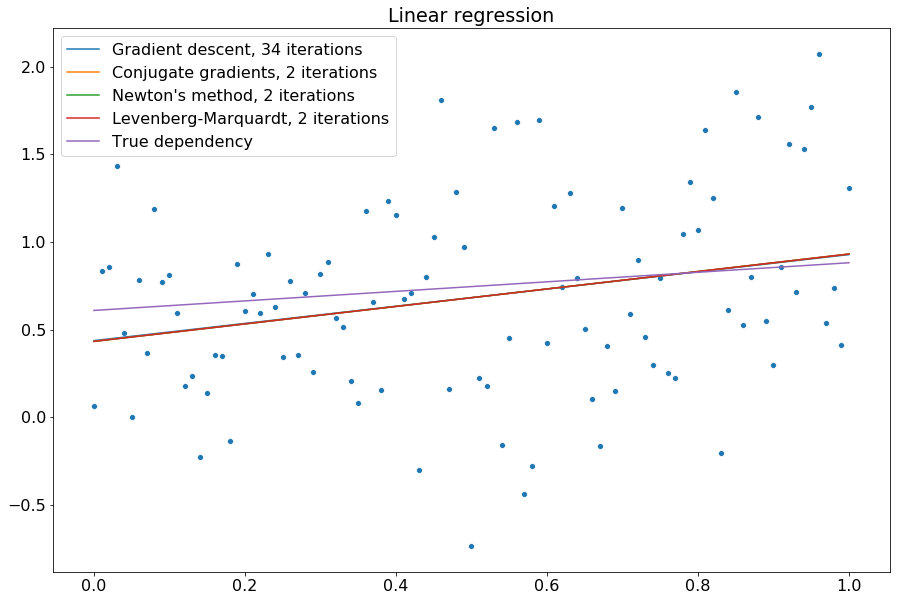

In [65]:
p_1, n_it_1 = gradient_descent(linear_objective, np.array([0., 0.]), 0.001, 0.007)
p_2, n_it_2 = conjugate_gradients(linear_objective, np.array([0., 0.]), 0.001)
p_3, n_it_3 = newtons_method(linear_objective, np.array([0., 0.]), 0.001, 0.001)
p_4, n_it_4 = levenberg_marquardt(F, x, y, np.array([0., 0.]), 0.001)

y_pred_1 = F(x, *p_1)
y_pred_2 = F(x, *p_2)
y_pred_3 = F(x, *p_3)
y_pred_4 = F(x, *p_4)
y_true = F(x, alpha, beta)

plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
sns.scatterplot(x, y)
plt.plot(x, y_pred_1, label=f'Gradient descent, {n_it_1} iterations')
plt.plot(x, y_pred_2, label=f'Conjugate gradients, {n_it_2} iterations')
plt.plot(x, y_pred_3, label=f'Newton\'s method, {n_it_3} iterations')
plt.plot(x, y_pred_4, label=f'Levenberg-Marquardt, {n_it_4} iterations')
plt.plot(x, y_true, label='True dependency')
plt.legend()
plt.title('Linear regression')
plt.savefig('linear3.png')

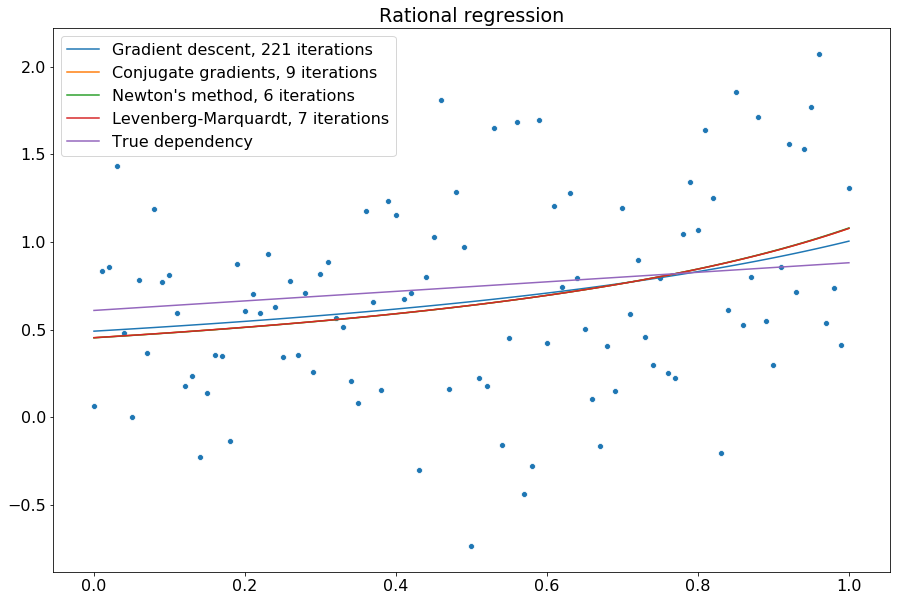

In [66]:
p_5, n_it_5 = gradient_descent(rational_objective, np.array([0., 0.]), 0.001, 0.0005)
p_6, n_it_6 = conjugate_gradients(rational_objective, np.array([0., 0.]), 0.001)
p_7, n_it_7 = newtons_method(rational_objective, np.array([0.5, -0.5]), 0.001, 0.5)
p_8, n_it_8 = levenberg_marquardt(G, x, y, np.array([0., 0.]), 0.001)

y_pred_5 = G(x, *p_5)
y_pred_6 = G(x, *p_6)
y_pred_7 = G(x, *p_7)
y_pred_8 = G(x, *p_8)
y_true = F(x, alpha, beta)

plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
sns.scatterplot(x, y)
plt.plot(x, y_pred_5, label=f'Gradient descent, {n_it_5} iterations')
plt.plot(x, y_pred_6, label=f'Conjugate gradients, {n_it_6} iterations')
plt.plot(x, y_pred_7, label=f'Newton\'s method, {n_it_7} iterations')
plt.plot(x, y_pred_8, label=f'Levenberg-Marquardt, {n_it_8} iterations')
plt.plot(x, y_true, label='True dependency')
plt.legend()
plt.title('Rational regression')
plt.savefig('rational3.png')